### Imports

In [64]:
import matplotlib as mpl
# mpl.use('TkAgg') # Use this backend for displaying plots in window
# mpl.use('Agg') # Use this backend for writing plots to file

import matplotlib.pyplot as plt
# plt.style.use('seaborn-talk')
mpl.rcParams['figure.figsize'] = [16, 9]
mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Computer Modern Roman'
mpl.rcParams['lines.linewidth'] = 1.25
mpl.rcParams['lines.markersize'] = 6
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import h5py
import sys
import os
import time as TIME
import multiprocessing as mprocs
from threading import Thread
from subprocess import Popen, PIPE
from mpl_toolkits.axes_grid1 import make_axes_locatable
from itertools import zip_longest
from matplotlib.gridspec import GridSpec
from matplotlib.pyplot import cm 
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
from numba import jit

### Create Dataspace 

In [105]:
# N = 2**np.arange(4, 9)
N = [64, 128, 256, 512]

# alpha = np.append(np.append(np.arange(0.0, 1.0, 0.05), np.arange(1.0, 2.0, 0.025)), np.arange(2.0, 2.5, 0.05))
alpha = np.arange(0.0, 3.5, 0.05)

k0    = 2
beta  = 0
iters = 400000
trans = 0

#### Input / Output Directories

In [106]:
input_dir_ali  = "/work/projects/TurbPhase/burgers_1d_code/Burgers_PO/Data/Output/LCE"
output_dir     = "/work/projects/TurbPhase/burgers_1d_code/Burgers_PO/Data/Snapshots/Spectra"
input_dir_zer  = "/work/projects/TurbPhase/burgers_1d_code/Burgers_PO/Data/RESULTS"

### Plot

In [107]:
max_spec_al  = np.zeros((len(alpha), len(N)))
max_spec_zer = np.zeros((len(alpha), len(N)))

exp = 0
k   = k0
for n in range(0, len(N)):

    spectra_al  = np.zeros((len(alpha), int(N[n] / 2 - k0)))    
    spectra_zer = np.zeros((len(alpha), int(N[n] / 2 - k0)))    

    for a in range(0, len(alpha)):

        # Read in data
        filename_al  = "/LCE_Runtime_Data_N[{}]_k0[{}]_ALPHA[{:0.3f}]_BETA[{:0.3f}]_u0[ALIGNED]_ITERS[{}].h5".format(N[n], k, alpha[a], beta, iters)
        filename_zer = "/RESULTS_N[{}]_k0[{}]_ALPHA[{:0.3f}]_BETA[{:0.3f}]_u0[{}]/LCEData_ITERS[{}]_TRANS[{}].h5".format(N[n], k, alpha[a], beta, "ZERO", iters, trans)
        file_al  = h5py.File(input_dir_ali + filename_al, 'r')
        file_zer = h5py.File(input_dir_zer + filename_zer, 'r')

        # Extract LCE Data
        lce_al  = file_al['LCE']
        lce_zer = file_zer['LCE']

        # Extract final state
        spectrum_al  = lce_al[-1, :]
        spectrum_zer = lce_zer[-1, :]
        spectra_al[a, :]  = spectrum_al
        spectra_zer[a, :] = spectrum_zer

        max_spec_al[a, n]  = lce_al[-1, exp]
        max_spec_zer[a, n] = lce_zer[-1, exp]

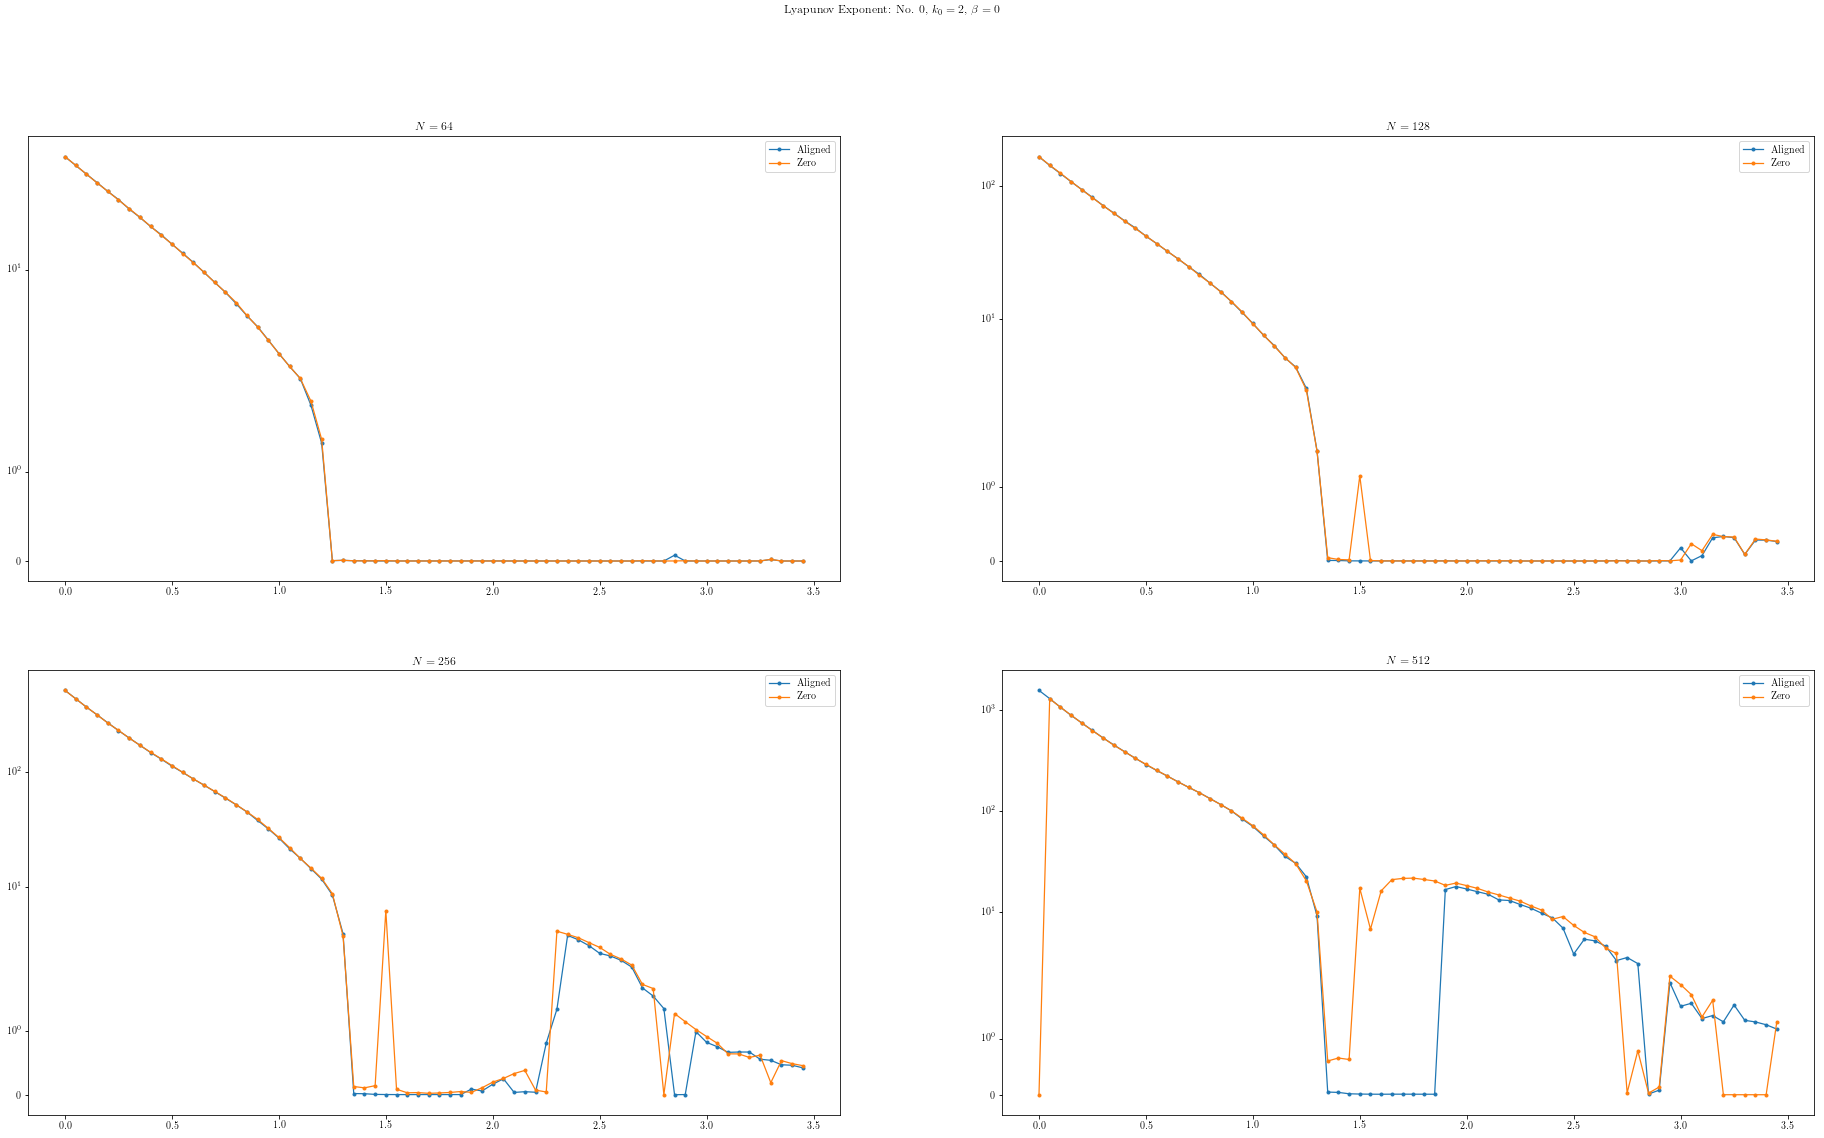

In [108]:
## CREATE FIGURE
fig = plt.figure(figsize = (32, 18), tight_layout = False)
gs  = GridSpec(2, 2)

for i, p in enumerate([(0, 0), (0, 1), (1, 0), (1, 1)]):
    ax = fig.add_subplot(gs[p])
    ax.plot(alpha, max_spec_al[:, i], '.-')
    ax.plot(alpha, max_spec_zer[:, i], '.-')
    ax.legend([r"Aligned", r"Zero"])
    ax.set_title(r"$N = {}$".format(N[i]))
    ax.set_yscale('symlog')
    
plt.suptitle(r"Lyapunov Exponent: No. {}, $k_0 = {}$, $\beta = {}$".format(exp, k0, beta))
plt.show()

In [94]:
print(max_spec_zer)

filename_zer = "/RESULTS_N[{}]_k0[{}]_ALPHA[{:0.3f}]_BETA[{:0.3f}]_u0[{}]/LCEData_ITERS[{}]_TRANS[{}].h5".format(64, k0, 1.5, beta, "ZERO", iters, trans)
file_zer     = h5py.File(input_dir_zer + filename_zer, 'r')

# Extract LCE Data
lce_zer = file_zer['LCE']

print(lce_zer[-1, exp])


filename_zer = "/RESULTS_N[{}]_k0[{}]_ALPHA[{:0.3f}]_BETA[{:0.3f}]_u0[{}]/LCEData_ITERS[{}]_TRANS[{}].h5".format(64, k0, 1.5, beta, "ZERO", iters, trans)
file_zer     = h5py.File(input_dir_zer + filename_zer, 'r')

# Extract LCE Data
lce_zer = file_zer['LCE']

[[ 2.98067623e+01  1.20554754e+02  4.15264368e+02  0.00000000e+00]
 [ 2.62067369e+01  1.03023655e+02  3.46054759e+02  1.08134841e+03]
 [ 2.28403375e+01  8.86770209e+01  2.89350921e+02  8.82517381e+02]
 [ 2.00266512e+01  7.59156763e+01  2.43791128e+02  7.26563397e+02]
 [ 1.73909724e+01  6.51725519e+01  2.04980876e+02  6.02568050e+02]
 [ 1.51616214e+01  5.59285360e+01  1.74634701e+02  4.99849048e+02]
 [ 1.32861962e+01  4.81434978e+01  1.48158342e+02  4.17390676e+02]
 [ 1.14389793e+01  4.12809277e+01  1.26224279e+02  3.52040702e+02]
 [ 9.89837223e+00  3.55318873e+01  1.08153244e+02  2.99303876e+02]
 [ 8.50839517e+00  3.06511491e+01  9.34019934e+01  2.55528741e+02]
 [ 7.30469444e+00  2.64078721e+01  8.01900035e+01  2.20797914e+02]
 [ 6.23120250e+00  2.27378243e+01  6.91675261e+01  1.90987938e+02]
 [ 5.24945017e+00  1.95010843e+01  6.00648005e+01  1.66457559e+02]
 [ 4.42543100e+00  1.67309860e+01  5.25031978e+01  1.45684763e+02]
 [ 3.72526375e+00  1.43086058e+01  4.56004781e+01  1.27453935e

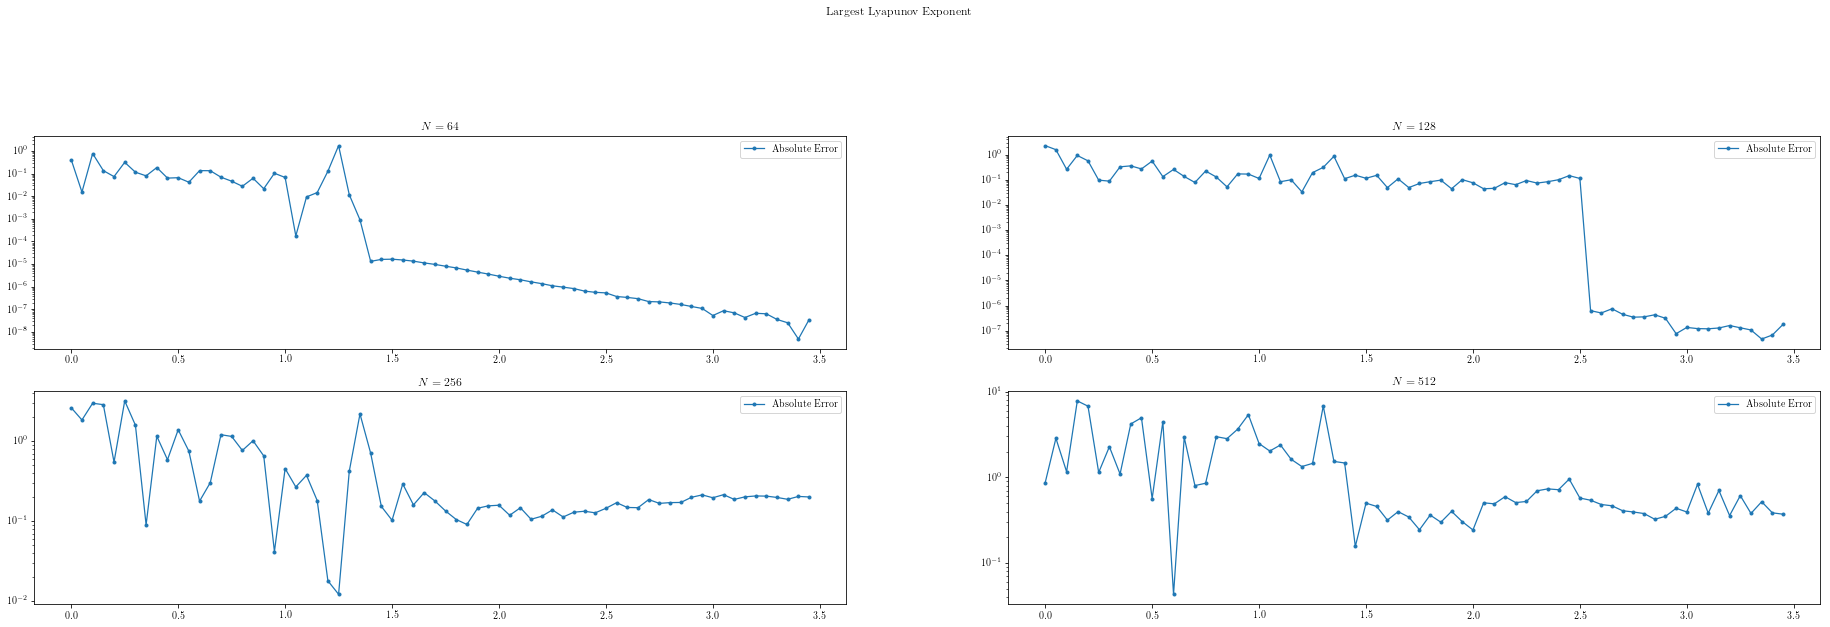

In [51]:
fig = plt.figure(figsize = (32, 18), tight_layout = False)
gs  = GridSpec(4, 2)

for i, p in enumerate([(0, 0), (0, 1), (1, 0), (1, 1)]):
    ax = fig.add_subplot(gs[p])
    ax.plot(alpha, np.absolute(max_spec_al[:, i] - max_spec_zer[:, i]), '.-')
    ax.legend([r"Absolute Error"])
    ax.set_title(r"$N = {}$".format(N[i]))
    ax.set_yscale('log')

plt.suptitle(r"Largest Lyapunov Exponent")
plt.show()